# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [51]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define column names
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 
    'temp', 'rh', 'wind', 'rain', 'area' 
]

In [52]:
# Load the dataset 
fires_dt = pd.read_csv("C:/Users/re/DSI/production/05_src/data/forest+fires/forestfires.csv", header=0, names=columns)

# Check the structure
fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [54]:
from sklearn.model_selection import train_test_split


# Create features and target
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
X.sample(5, random_state=42)


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [57]:
# Preprocessing Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline

# Define numeric and categorical features
numeric_features = ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day', 'coord_x', 'coord_y']


preproc1 = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [59]:
# Preprocessor 2: With non-linear transformation
preproc2 = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('power', PowerTransformer())
    ]), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [60]:
# Model Pipelines
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Pipeline A: preproc1 + KNN (Baseline)
pipe_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', KNeighborsRegressor())
])

In [61]:
# Pipeline B: preproc2 + KNN (Baseline + nonlinear preproc)
pipe_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', KNeighborsRegressor())
])

In [63]:
# Pipeline C: preproc1 + Random Forest
pipe_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [65]:
# Pipeline D: preproc2 + Random Forest (Advanced + nonlinear preproc)
pipe_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [66]:
from sklearn.model_selection import GridSearchCV

# Grid for KNN pipelines
param_grid_knn = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance']
}

# Grid for Random Forest pipelines
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10]
}


In [67]:
# GridSearch for Pipeline A (preproc1 + KNN)
grid_A = GridSearchCV(pipe_A, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_A.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['month',
                                                                          'day',
                                                                          'coord_x',
                                                                          'coord_y'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [68]:
# GridSearch for Pipeline B (preproc2 + KNN)
grid_B = GridSearchCV(pipe_B, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_B.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['month',
                                                                          'day',
                                                                          'coord_x',
                                                                          'coord_y'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [69]:
# GridSearch for Pipeline C (preproc1 + Random Forest)
grid_C = GridSearchCV(pipe_C, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_C.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['month',
                                                                          'day',
                                                                          'coord_x',
                                                                          'coord_y'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [70]:
# GridSearch for Pipeline D (preproc2 + Random Forest)
grid_D = GridSearchCV(pipe_D, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_D.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['month',
                                                                          'day',
                                                                          'coord_x',
                                                                          'coord_y'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

# Evaluate

+ Which model has the best performance?

# Export

+ Save the best performing model to a pickle file.

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Store models in a list for convenience
grids = [grid_A, grid_B, grid_C, grid_D]
labels = ['Pipeline A (preproc1 + KNN)', 'Pipeline B (preproc2 + KNN)', 
          'Pipeline C (preproc1 + RF)', 'Pipeline D (preproc2 + RF)']

# Evaluate each model
for model, label in zip(grids, labels):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{label}:")
    print(f"  Best params: {model.best_params_}")
    print(f"  Test RMSE: {rmse:.3f}")
    print(f"  R² score: {r2:.3f}\n")

Pipeline A (preproc1 + KNN):
  Best params: {'regressor__n_neighbors': 9, 'regressor__weights': 'uniform'}
  Test RMSE: 108.941
  R² score: -0.007

Pipeline B (preproc2 + KNN):
  Best params: {'regressor__n_neighbors': 9, 'regressor__weights': 'uniform'}
  Test RMSE: 109.600
  R² score: -0.019

Pipeline C (preproc1 + RF):
  Best params: {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
  Test RMSE: 109.085
  R² score: -0.009

Pipeline D (preproc2 + RF):
  Best params: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
  Test RMSE: 109.113
  R² score: -0.010



In [83]:
# Import joblib
import joblib

# Export the best model — assuming grid_A was best
best_model = grid_A.best_estimator_

# Save the model 
joblib.dump(best_model, "best_model_pipeline_A.pkl")

# Confirm the model was saved
print("Best model from Pipeline A has been saved as 'best_model_pipeline_A.pkl'.")


Best model from Pipeline A has been saved as 'best_model_pipeline_A.pkl'.


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

100%|██████████| 50/50 [01:49<00:00,  2.18s/it]


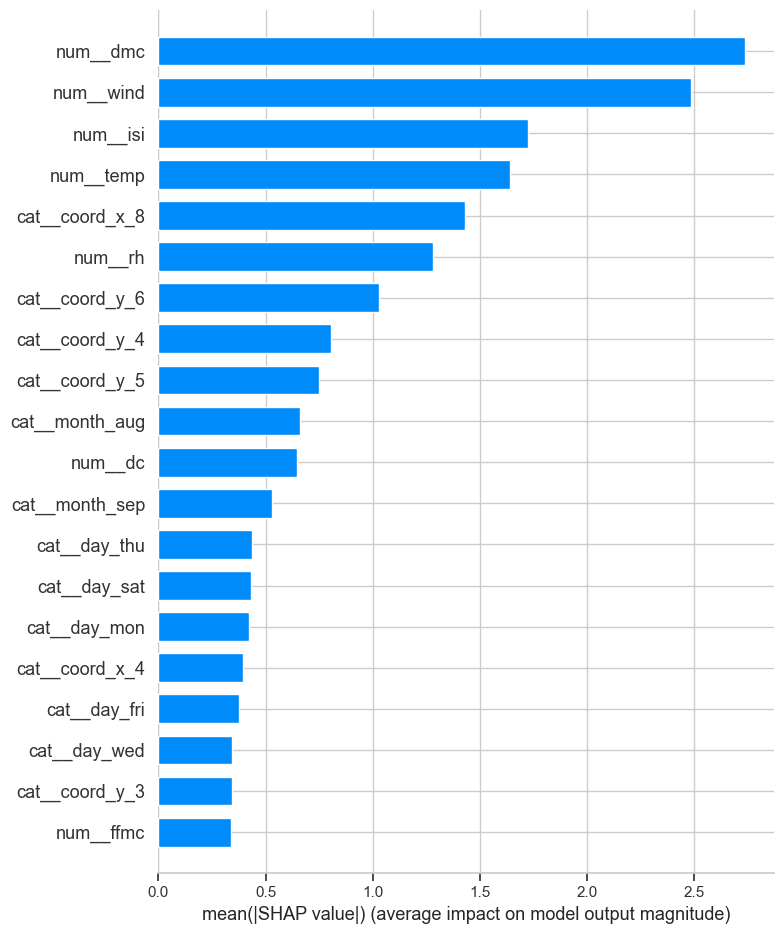

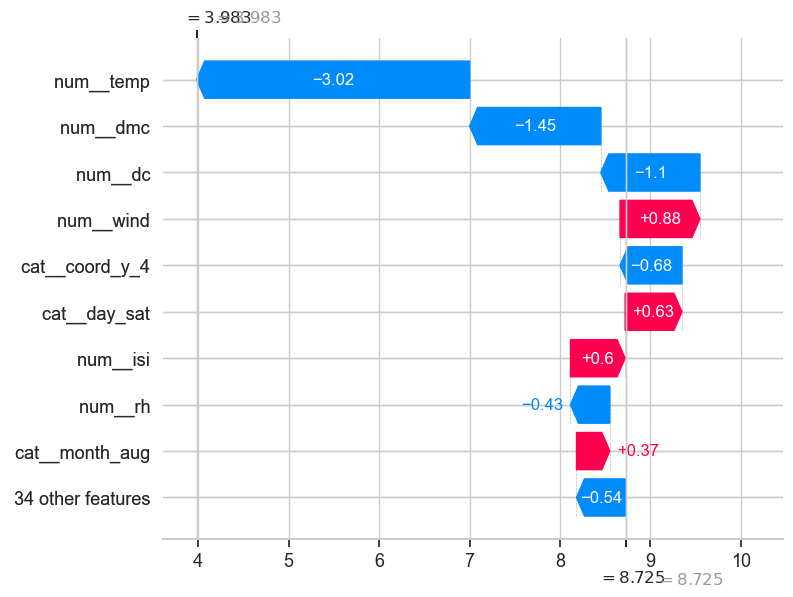

<Figure size 640x480 with 0 Axes>

In [86]:
# Importing libraries
import shap
import numpy as np
import matplotlib.pyplot as plt

# Ensure matplotlib doesn't apply scientific offset formatting
plt.rcParams['axes.formatter.useoffset'] = False

# Extract preprocessor and regressor from the best pipeline
preprocessor = best_model.named_steps['preprocessing']
regressor = best_model.named_steps['regressor']

# Transform the test set using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Convert to dense array if sparse (SHAP requires dense format)
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

# Create a small representative background sample for SHAP (used by KernelExplainer)
background = shap.utils.sample(X_test_transformed, 50, random_state=42)

# Initialize KernelExplainer for non-tree-based models like KNN
explainer = shap.KernelExplainer(regressor.predict, background)

# Compute SHAP values on the first 50 test samples (for speed)
shap_values = explainer.shap_values(X_test_transformed[:50])

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Global Explanation (Feature Importance)
shap.summary_plot(
    shap_values,
    features=X_test_transformed[:50],
    feature_names=feature_names,
    plot_type="bar"
)

# Local Explanation (Waterfall for the first test sample)
# Determine expected value safely
expected_value = explainer.expected_value[0] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the waterfall for the first test observation
shap.plots._waterfall.waterfall_legacy(
    expected_value=expected_value,
    shap_values=shap_values[0],
    features=X_test_transformed[0],
    feature_names=feature_names,
    max_display=10
)

# Clean up layout if used in notebook
plt.tight_layout()
plt.show()



*(Answer here.)*

In [ ]:
# For the best-performing model (Pipeline A: preproc1 + KNN), I used SHAP to interpret the predictions.
# Local Explanation: Looking at one specific test sample, the temperature (num__temp) had the strongest 
# negative effect on the predicted burned area, pushing it down by over 3 ha. Other dryness-related features 
# like dmc and dc also pulled the prediction lower. On the other hand, wind speed (num__wind) and 
# even day_sat had a positive push on the output — likely linked to how human activity or weekend patterns might contribute to fire spread. 

# Global Explanation: Across all 50 test samples, the most impactful features were: dmc (Duff Moisture Code), wind, isi (Initial Spread Index), temp

# in short, fires are driven by how dry, hot, and windy conditions are. I also saw some consistent spatial patterns, 
# like coord_x_8 and coord_y_6, meaning that certain locations are just more fire-prone, probably due to terrain or vegetation type.

# What to remove: A few features had almost zero contribution — like day_fri, coord_y_3, and ffmc. 
# If I had to simplify the model, I’d start by dropping those. To check if they matter, I’d retrain the model without them and compare performance. 
# If nothing changes, they’re out for good.



## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.